<a href="https://colab.research.google.com/github/deondmello16/PyTorch-Journey/blob/main/PyTorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch WorkFlow Fundamentals

| Topic |	Contents |
|--------|-----------|
| 1. Getting data ready	| Data can be almost anything but to get started we're going to create a simple straight line|
| 2. Building a model |	Here we'll create a model to learn patterns in the data, we'll also choose a loss function, optimizer and build a training loop.|
| 3. Fitting the model to data (training)	| We've got data and a model, now let's let the model (try to) find patterns in the (training) data.|
| 4. Making predictions and evaluating a model (inference) |	Our model's found patterns in the data, let's compare its findings to the actual (testing) data.|
| 5. Saving and loading a model |	You may want to use your model elsewhere, or come back to it later, here we'll cover that.|
| 6. Putting it all together |	Let's take all of the above and combine it.|

In [ ]:
import torch
from torch import nn
import  matplotlib.pyplot as plt

 linear regression to create the data with known parameters (things that can be learned by a model) and then we'll use PyTorch to see if we can build model to estimate these parameters using gradient descent.

In [ ]:
# creating data from arange()

weight = 0.7
bias = 0.3

X = torch.arange(start = 0 , end = 1, step = 0.02).unsqueeze(dim = 1)

y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
train_split = int (0.8 * len(X))

X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

In [ ]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  plt.figure(figsize=(5,5))

  plt.scatter(train_data, train_labels, c="g", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="r", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="y", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

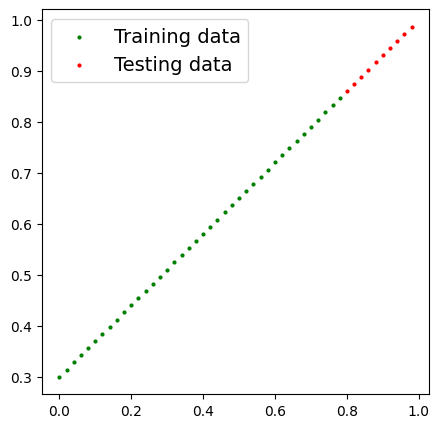

In [ ]:
plot_predictions()

In [ ]:
# Creating a linear regression model

class LinerRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad = True,
                                            dtype = torch.float))

    self.bias = nn.Parameter(torch.randn(1,
                                      requires_grad = True,
                                      dtype = torch.float))

  def forward(self , x : torch.Tensor ) -> torch.Tensor :
    return self.weights * x + self.bias


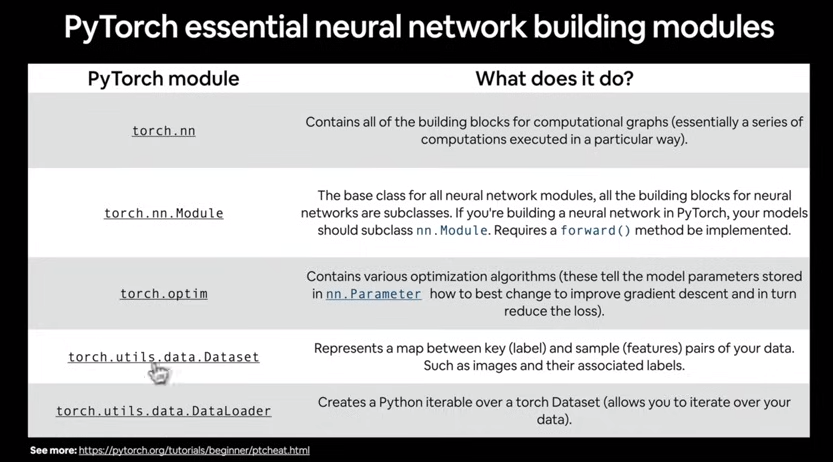



In [ ]:
torch.manual_seed(42)

model_0 = LinerRegressionModel()

In [ ]:
parameters = model_0.parameters()
print(list(parameters))

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]


In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# now making predictions

with torch.inference_mode():
  y_pred = model_0(X_test)

In [ ]:
y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

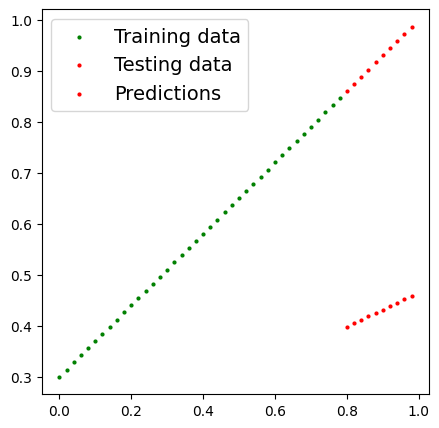

In [ ]:
plot_predictions(predictions = y_pred)

In [ ]:
# make loss function


loss_fn = nn.L1Loss()

optimizer = torch.optim.Adam(
    params = model_0.parameters(),
    lr = 0.1
)

In [ ]:
%%time

torch.manual_seed(42)

epochs = 100+1

train_loss_values = []
test_loss_values = []
epoch_count = []


for epoch in range(epochs):

  model_0.train()


  y_pred = model_0(X_train)

  loss = loss_fn(y_pred,y_train)

  optimizer.zero_grad()


  loss.backward()

  optimizer.step()

  model_0.eval()

  with torch.inference_mode():

    test_pred = model_0(X_test)

    test_loss = loss_fn(test_pred,y_test.type(torch.float))

    if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.3055362105369568 
Epoch: 10 | MAE Train Loss: 0.08052726089954376 | MAE Test Loss: 0.14941033720970154 
Epoch: 20 | MAE Train Loss: 0.036169495433568954 | MAE Test Loss: 0.04821174591779709 
Epoch: 30 | MAE Train Loss: 0.018328379839658737 | MAE Test Loss: 0.034052927047014236 
Epoch: 40 | MAE Train Loss: 0.013249504379928112 | MAE Test Loss: 0.0009426653268747032 
Epoch: 50 | MAE Train Loss: 0.01413458026945591 | MAE Test Loss: 0.0024834454525262117 
Epoch: 60 | MAE Train Loss: 0.004458447452634573 | MAE Test Loss: 0.010442674160003662 
Epoch: 70 | MAE Train Loss: 0.003154963254928589 | MAE Test Loss: 0.005274301860481501 
Epoch: 80 | MAE Train Loss: 0.005673391278833151 | MAE Test Loss: 0.011116951704025269 
Epoch: 90 | MAE Train Loss: 0.0037604384124279022 | MAE Test Loss: 0.006854933686554432 
Epoch: 100 | MAE Train Loss: 0.010667501017451286 | MAE Test Loss: 0.012244636192917824 
CPU times: user 78.5 ms, sys: 22.9 m

In [ ]:
with torch.inference_mode():
  new_preds = model_0(X_test)

In [ ]:
new_preds-y_test

tensor([[0.0118],
        [0.0119],
        [0.0120],
        [0.0121],
        [0.0122],
        [0.0123],
        [0.0124],
        [0.0125],
        [0.0126],
        [0.0127]])

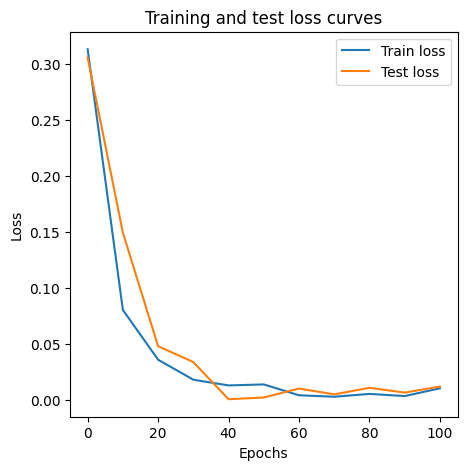

In [ ]:
# Plot the loss curves
plt.figure(figsize =(5,5))
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.7050], requires_grad=True),
 Parameter containing:
 tensor([0.3078], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.7050])), ('bias', tensor([0.3078]))])

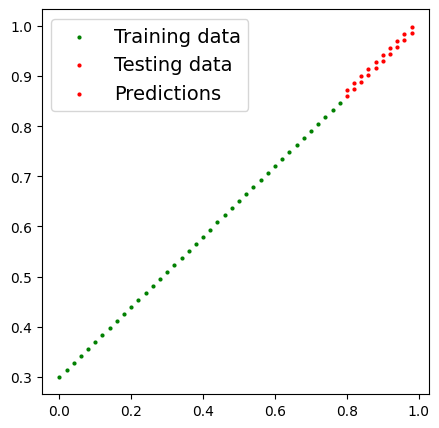

In [ ]:
plot_predictions(predictions=new_preds)

In [ ]:
# time to save the model

from pathlib import Path


MODEL_PATH =  Path('model')
MODEL_PATH.mkdir(parents=True, exist_ok= True)


MODEL_NAME = "model_0.pth"

MODEL_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model_0.state_dict(), f = MODEL_PATH )

In [ ]:
# Check the saved file path
!ls -l model/model_0.pth

-rw-r--r-- 1 root root 1496 Jan 31 06:43 model/model_0.pth


In [ ]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinerRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_PATH))

<All keys matched successfully>

In [ ]:
# 1. Put the loaded model into evaluation mode
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test) # perform a forward pass on the test data with the loaded model

## Using GPU for computation

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
weights = 0.7
bias  = 0.3

start = 0
end = 11
step = 0.1
x = torch.arange(start , end , step ).unsqueeze(axis=1)

y = weights * x + bias

y[:10]

tensor([[0.3000],
        [0.3700],
        [0.4400],
        [0.5100],
        [0.5800],
        [0.6500],
        [0.7200],
        [0.7900],
        [0.8600],
        [0.9300]])

In [ ]:
x_split = int(0.8*len(x))

In [ ]:
X_train, y_train = x[:x_split], y[:x_split]
X_test, y_test = x[x_split:], y[x_split:]

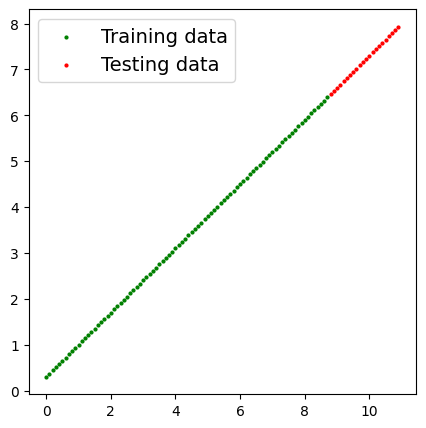

In [ ]:
# Note: If you've reset your runtime, this function won't work,
# you'll have to rerun the cell above where it's instantiated.
plot_predictions(X_train, y_train, X_test, y_test)

In [ ]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()

    self.liner_layer = nn.Linear(in_features = 1,
                                 out_features= 1,)

  def forward(self, x : torch.Tensor) -> torch.Tensor:
    return self.liner_layer(x)

In [ ]:
torch.manual_seed(42)

model_1 = LinearRegressionModelV2()

model_1.state_dict()

OrderedDict([('liner_layer.weight', tensor([[0.7645]])),
             ('liner_layer.bias', tensor([0.8300]))])

In [ ]:
# Check model device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
device

'cuda'

In [ ]:
# Set model to GPU if it's availalble, otherwise it'll default to CPU
model_1.to(device) # the device variable was set above to be "cuda" if available or "cpu" if not
next(model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.Adam(params = model_1.parameters(),
                             lr = 0.01)

In [ ]:
epochs = 1000

X_train = X_train.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)
X_test =X_test.to(device)

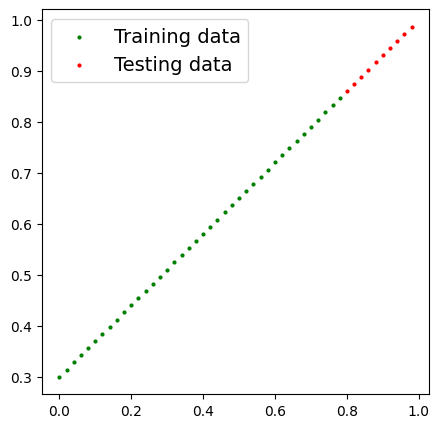

In [ ]:
plot_predictions()

In [ ]:
# X_train

In [ ]:
for epoch in range(epochs+1):

  model_1.train()

  y_pred = model_1(X_train)

  loss = loss_fn(y_pred,y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_1.eval()

  with torch.inference_mode():

    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred,y_test)

  if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")



Epoch: 0 | Train loss: 0.047693438827991486 | Test loss: 0.011778419837355614
Epoch: 100 | Train loss: 0.008326130919158459 | Test loss: 0.0033512115478515625
Epoch: 200 | Train loss: 0.00608374597504735 | Test loss: 0.0007417635642923415
Epoch: 300 | Train loss: 0.009984883479773998 | Test loss: 0.028079381212592125
Epoch: 400 | Train loss: 0.0035540065728127956 | Test loss: 0.016341036185622215
Epoch: 500 | Train loss: 0.0031473811250180006 | Test loss: 0.0041097295470535755
Epoch: 600 | Train loss: 0.01122316624969244 | Test loss: 0.010630737990140915
Epoch: 700 | Train loss: 0.014641531743109226 | Test loss: 0.016870129853487015
Epoch: 800 | Train loss: 9.436973050469533e-05 | Test loss: 0.011673884466290474
Epoch: 900 | Train loss: 0.00970749743282795 | Test loss: 0.0295645110309124
Epoch: 1000 | Train loss: 0.0008240186725743115 | Test loss: 0.008349635638296604


In [ ]:
with torch.inference_mode():
  new_preds = model_1(X_test)
new_preds - y_test

tensor([[-0.0075],
        [-0.0076],
        [-0.0077],
        [-0.0078],
        [-0.0078],
        [-0.0079],
        [-0.0080],
        [-0.0081],
        [-0.0082],
        [-0.0082],
        [-0.0083],
        [-0.0084],
        [-0.0085],
        [-0.0085],
        [-0.0086],
        [-0.0087],
        [-0.0088],
        [-0.0089],
        [-0.0089],
        [-0.0090],
        [-0.0091],
        [-0.0092]], device='cuda:0')

In [ ]:
len(new_preds.cpu()) == len(X_test)

True

In [ ]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  plt.figure(figsize=(5,5))

  plt.scatter(train_data.cpu(), train_labels.cpu(), c="g", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data.cpu(), test_labels.cpu(), c="r", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data.cpu(), predictions.cpu(), c="y", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

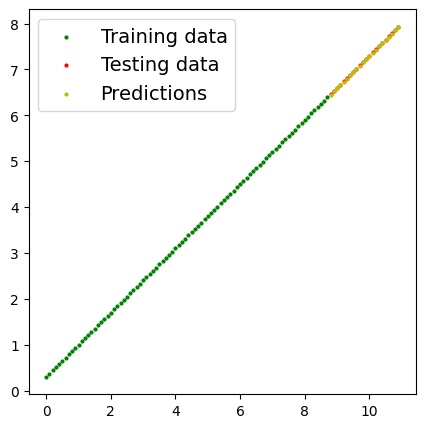

In [ ]:
plot_predictions(test_data = X_test.cpu() , predictions=new_preds.cpu())